## Data Science Project – Student Performance Analysis with Machine Learning
It takes a lot of manual effort to complete the evaluation process as even one college may contain thousands of students.

### Importing the libraries

In [4]:
#!pip install dabl
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import plotly.express as px
import dabl

### Importing the dataset

In [5]:
data = pd.read_csv('StudentsPerformance.csv')

# getting the shape of the data
print(C.shape)

(1000, 8)


In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [10]:
# lets check the percentage of missing data in each columns present in the data 
no_of_colums = data.shape[0]
percentage_of_missing_data = data.isna().sum()/no_of_colums
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


Target looks like regression


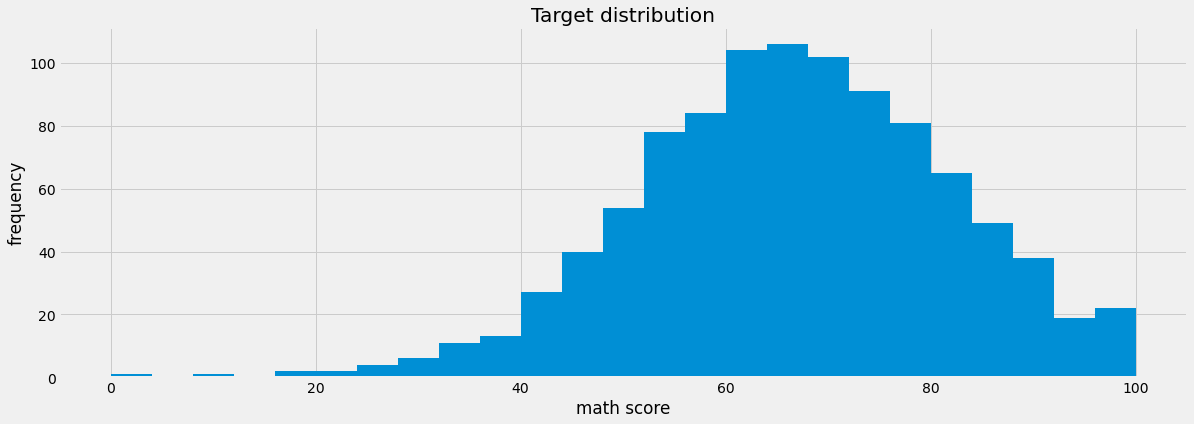

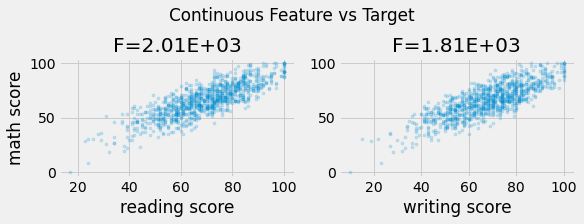

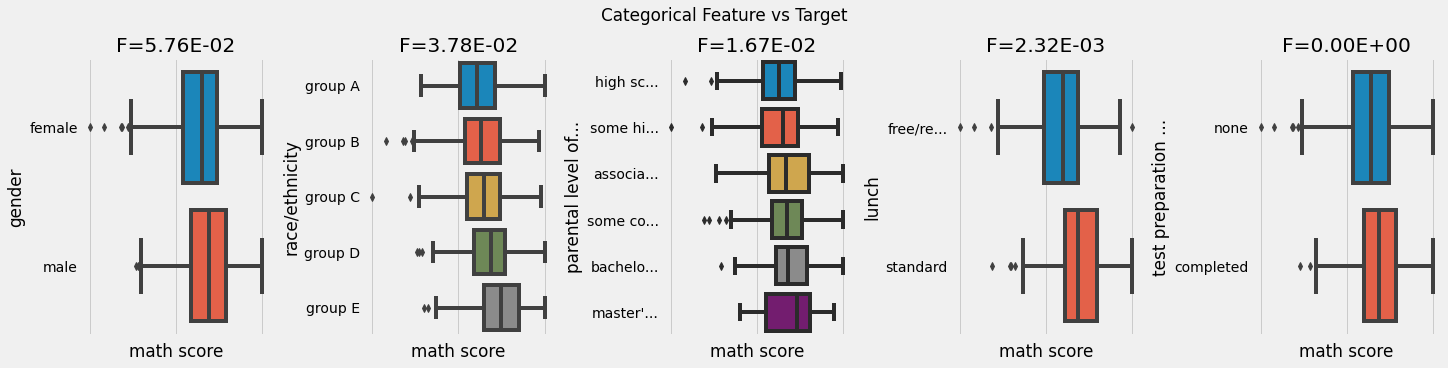

In [11]:
# To see comparison of all other attributes with respect to Math Marks
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

Target looks like regression


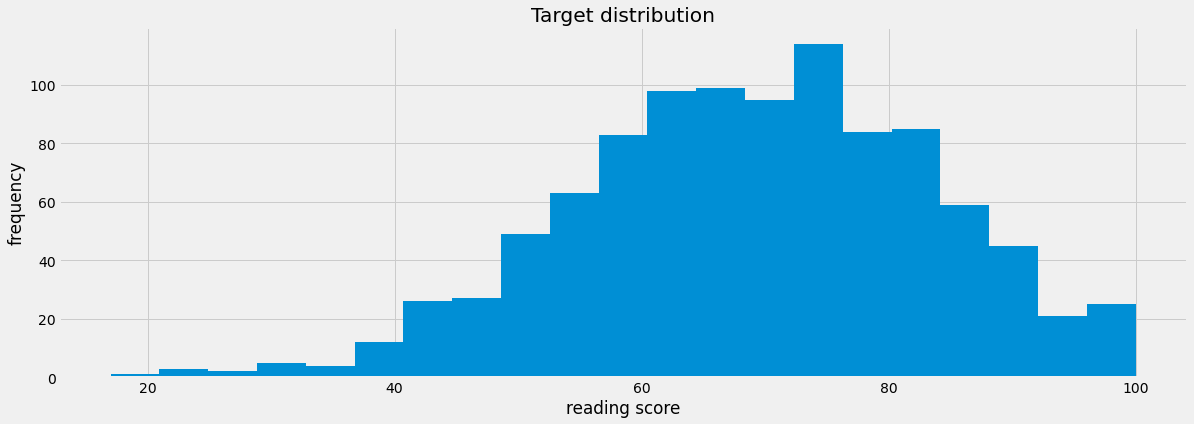

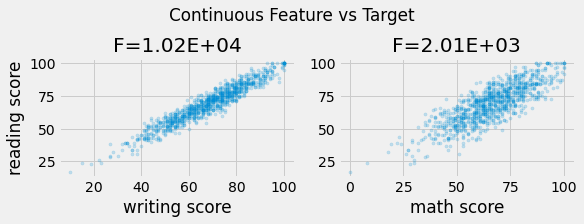

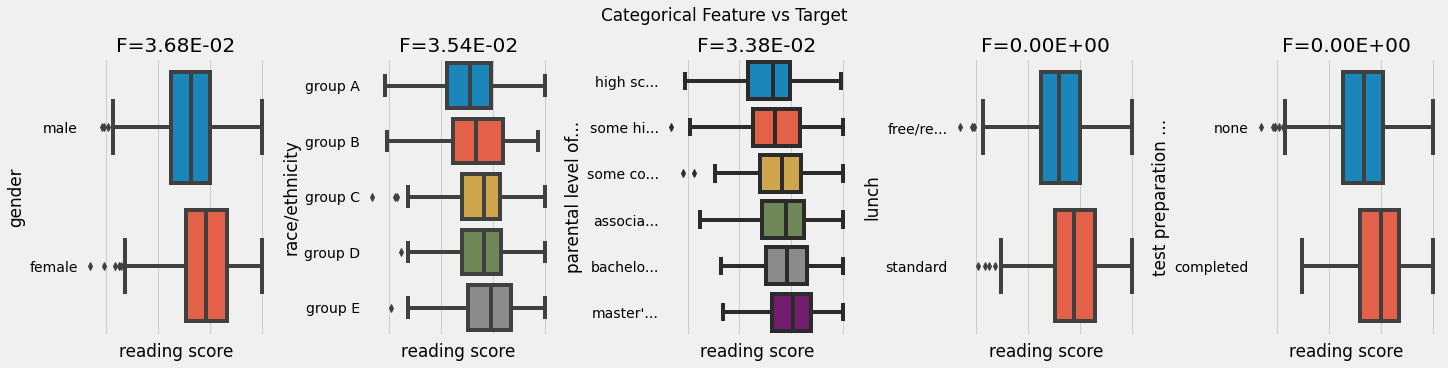

In [12]:
# Comparison of all other attributes with respect to Reading Marks :
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score')


In [13]:
# Lets check the Effect of Lunch on Student’s Performnce
data[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [14]:
# Lets check the Effect of Test Preparation Course on Scores
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

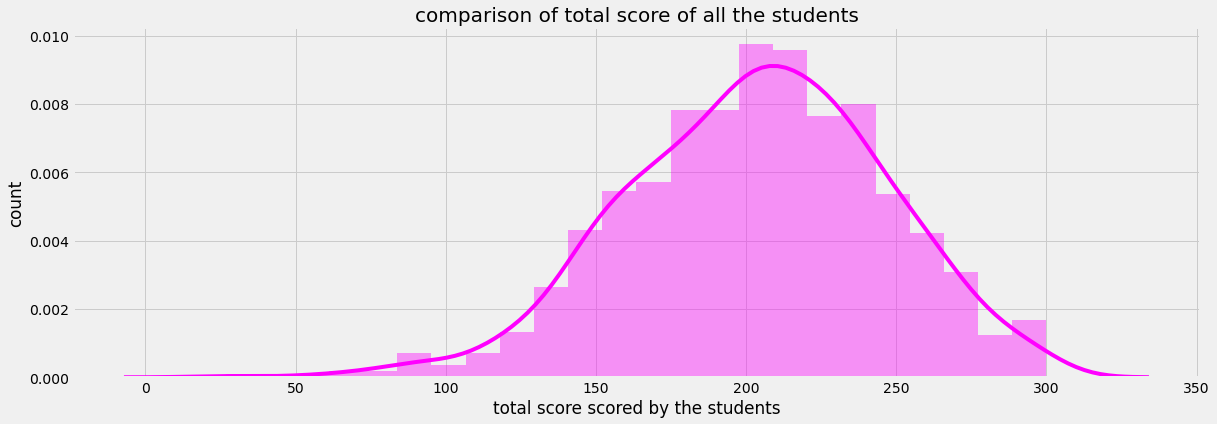

In [15]:
# Computing the total score for each student
import warnings
warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

### Label Encoding

In [17]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,0,2,1,1,1,72,72,74,218
1,0,3,4,1,0,69,90,88,247
2,0,2,3,1,1,90,95,93,278
3,1,1,0,0,1,47,57,44,148
4,1,3,4,1,1,76,78,75,229


In [19]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['pass_math'] = le.fit_transform(data['math scor'])

# label encoding for pass_reading
data['pass_reading'] = le.fit_transform(data['reading score'])

# label encoding for pass_writing
data['pass_writing'] = le.fit_transform(data['writing score'])

# label encoding for status
data['status'] = le.fit_transform(data['status'])

KeyError: 'math scor'